## EDA on Hashtags

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()
%matplotlib inline
# packages for NLP preprocessing
import nltk
from sklearn.feature_extraction import text 
from nltk.stem import WordNetLemmatizer 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pickle

In [2]:
# importing raw tweets before they were cleaned
raw_df = pd.read_pickle('../pickle/raw_tweets_df.pkl')

In [3]:
raw_df.head()

,total_votes,hate_speech_votes,other_votes,label,tweet
0,3,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


## Filtering Out Hashtags From Raw Tweets

In [4]:
raw_df['hashtags'] = raw_df['tweet'].str.extract('(#[\w]+)', expand=False).str.strip()

In [15]:
raw_df.head()

,total_votes,hate_speech_votes,other_votes,label,tweet,hashtags
0,3,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't...,no_hashtag
1,3,0,3,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,no_hashtag
2,3,0,3,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,no_hashtag
3,3,0,3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,no_hashtag
4,6,0,6,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,#57361


In [10]:
raw_df.shape

(24783, 6)

In [8]:
raw_df.hashtags.isna().sum()

17149

Only 30% of the tweets have hashtags on them 

In [12]:
raw_df['hashtags'].fillna('no_hashtag', inplace = True)

In [14]:
# checking that worked
raw_df.hashtags.isna().sum()

0

## Top Hashtags for Each Category

In [16]:
# creating new dfs for each classification
df_freq_hate = raw_df[raw_df['label']==1]
df_freq_not_hate = raw_df[raw_df['label']==0]

In [17]:
# pulling out the hashtags column for raw tweets
hashtag_hate = df_freq_hate['hashtags']
hashtag_not_hate = df_freq_not_hate['hashtags']

In [18]:
# exact amount of hashtags in hate speech
total_vocab_hate = set()
for comment in hashtag_hate:
    total_vocab_hate.update(comment)
len(total_vocab_hate)

62

In [19]:
# exact amount of hashtags in not hate speech
total_vocab_NOT_hate = set()
for comment in hashtag_not_hate:
    total_vocab_NOT_hate.update(comment)
len(total_vocab_NOT_hate)

64

## Most Common Words in Each Category

In [20]:
flat_hate = [item for sublist in hashtag_hate for item in sublist]
flat_not_hate = [item for sublist in hashtag_not_hate for item in sublist]

In [21]:
hate_freq = FreqDist(flat_hate)
not_hate_freq = FreqDist(flat_not_hate)

In [22]:
# Top 20 Hate Speech hashtags:
hate_freq.most_common(20)

[('a', 2291),
 ('h', 2246),
 ('o', 1195),
 ('s', 1191),
 ('t', 1183),
 ('n', 1159),
 ('g', 1146),
 ('_', 1102),
 ('#', 328),
 ('2', 266),
 ('8', 203),
 ('1', 156),
 ('0', 114),
 ('e', 90),
 ('5', 85),
 ('i', 77),
 ('r', 61),
 ('3', 57),
 ('l', 51),
 ('4', 43)]

In [23]:
# Top 20 non Hate Speech hashtags:
not_hate_freq.most_common(20)

[('a', 33249),
 ('h', 32513),
 ('t', 17014),
 ('o', 16988),
 ('s', 16972),
 ('n', 16912),
 ('g', 16447),
 ('_', 16047),
 ('2', 7309),
 ('#', 7306),
 ('8', 5476),
 ('1', 4605),
 ('0', 2970),
 ('5', 2647),
 ('3', 1596),
 ('e', 1582),
 ('4', 1366),
 ('r', 844),
 ('7', 830),
 ('i', 806)]

For some reason, only the first letter of the hashtags are being returned. Either there is an error in the code, or they are actual 1 letter hashtags. We might have to go back and adjust the data cleaning to make sure the code only picks up real hashtags. We'll revisit that later.

## Visualizing

In [25]:
# create counts of hate and not hate with values and words
hate_bar_counts = [x[1] for x in hate_freq.most_common(25)]
hate_bar_words = [x[0] for x in hate_freq.most_common(25)]

not_hate_bar_counts = [x[1] for x in not_hate_freq.most_common(25)]
not_hate_bar_words = [x[0] for x in not_hate_freq.most_common(25)]

In [40]:
# set the color of the bar graphs
color = cm.magma(np.linspace(.4,.8, 30))

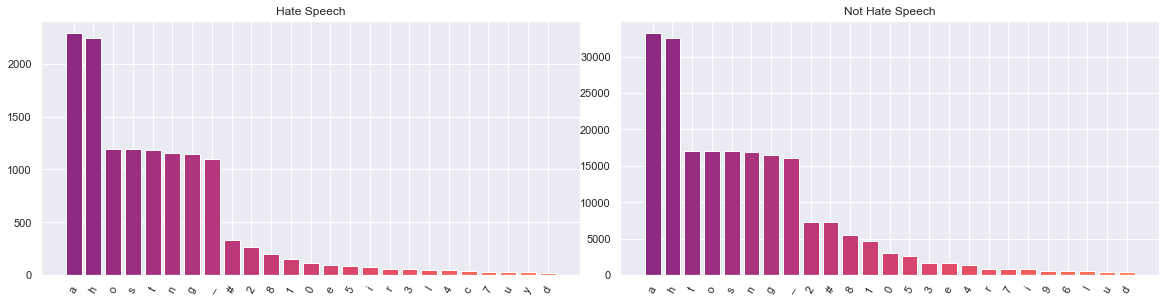

In [41]:
new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)
# generating a bar chart on each axes
ax.bar(hate_bar_words, hate_bar_counts, color=color)
ax2.bar(not_hate_bar_words, not_hate_bar_counts, color=color )

ax.title.set_text('Hate Speech')
ax2.title.set_text('Not Hate Speech')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
plt.tight_layout(pad=0)

# plt.savefig('word count bar graphs.png')
plt.show()